In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
os.getcwd()

'E:\\machinelearning\\Seesion 2'

In [3]:
flatdata = pd.read_csv('HomeBuyer.csv')
flatdata.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
X = flatdata.iloc[:, [0,1]].values
y = flatdata.iloc[:,2].values

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform(X_train)
X_test = independent_scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
from sklearn.linear_model import LogisticRegression
LRClassifier = LogisticRegression(random_state = 0)
LRClassifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
prediction = LRClassifier.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [11]:
#Create confusion matrix to evalute performance of data
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, prediction)
print(confusionMatrix)

[[65  3]
 [ 8 24]]


In [12]:
#Let us visualize it
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = LRClassifier.predict_proba(grid)[:,1].reshape(xx.shape)
print(probs)

[[  5.31793363e-08   5.37693571e-08   5.43659241e-08 ...,   3.17626301e-03
    3.21139025e-03   3.24690469e-03]
 [  5.42871110e-08   5.48894224e-08   5.54984164e-08 ...,   3.24221299e-03
    3.27806718e-03   3.31431655e-03]
 [  5.54179616e-08   5.60328197e-08   5.66544997e-08 ...,   3.30952776e-03
    3.34612386e-03   3.38312326e-03]
 ..., 
 [  9.78235714e-01   9.78469395e-01   9.78700622e-01 ...,   9.99999629e-01
    9.99999633e-01   9.99999637e-01]
 [  9.78670360e-01   9.78899475e-01   9.79126182e-01 ...,   9.99999636e-01
    9.99999640e-01   9.99999644e-01]
 [  9.79096511e-01   9.79321145e-01   9.79543416e-01 ...,   9.99999644e-01
    9.99999648e-01   9.99999651e-01]]


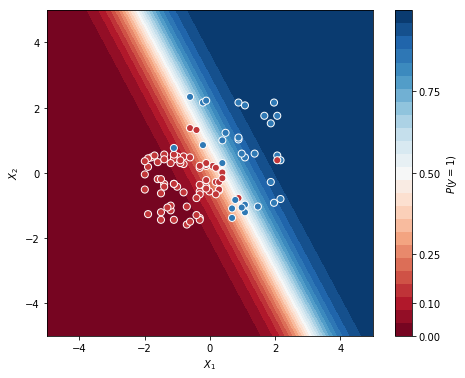

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y=1)$")
ax_c.set_ticks([0,.25,.5,.75,.1])

ax.scatter(X_test[:,0], X_test[:,1], c = (y_test == 1), s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(aspect="equal", xlim=(-5,5), ylim=(-5,5), xlabel="$X_1$",ylabel="$X_2$")

plt.show()

In [15]:
# Logistic regresion will give you probability of class as output.
# How to intrepret the output?
# It is represented as probablity from 0 to 1. Whoever is not purchased the house for him value 
#will be small value. Nut for a person who purchased the hose ot will be hghr vlau.


#Threshold value will be given Business people.

In [16]:
#predict wheter consumer will buy house or  not for given age and salary
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 